In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import numpy as np
import datetime
import pandas as pd
import sklearn as sk
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

In [2]:
data = pd.read_csv('/Users/alijanehsan/Downloads/Final_project/merge.csv', parse_dates=['date'], index_col =0)


In [3]:
data.head()

,date,item_code,quantity,unit_price_vat_excl,unit_cogs,unit_rrp_vat_excl,department,site,Revenue,country,...,category,gender,age,color,size,men,unisex,women,day,month
1,2021-12-09,ZB00245086,1,98.582325,63.816279,129.458420,E-COMMER,top4running.it,98.582325,Italy,...,running,men,adults,White,44,1,0,0,Thursday,December
2,2021-12-08,ZB00245086,1,100.182074,63.815891,131.559296,E-COMMER,top4running.at,100.182074,Austria,...,running,men,adults,White,44,1,0,0,Wednesday,December
3,2021-12-04,ZB00245086,1,98.350139,63.816279,129.153514,E-COMMER,top4running.it,98.350139,Italy,...,running,men,adults,White,44,1,0,0,Saturday,December
4,2021-11-14,ZB00245086,1,99.296899,63.815891,130.396884,E-COMMER,top4running.at,99.296899,Austria,...,running,men,adults,White,44,1,0,0,Sunday,November
5,2022-01-14,S101,1,3.109643,0.000000,3.109643,E-COMMER,top4football.de,3.109643,Germany,...,football,men,adults,Black,M,1,0,0,Friday,January


In [4]:
data['country'].value_counts()

Czech Republic    109802
Slovakia           62792
Romania            55512
Hungary            40442
Spain              28651
Germany            18215
France             17166
Italy              13789
Croatia             9168
Ireland             6047
Denmark             5738
Portugal            3668
Poland              3627
Netherland          3620
Sweden              3084
com                 2391
Austria             1827
Belgium             1414
Finland             1042
Slovenia             616
United Kingdom        10
other                  9
Bulgaria               5
Name: country, dtype: int64

In [5]:
df_cz = data[data['country']== 'Czech Republic']

df_cz

,date,item_code,quantity,unit_price_vat_excl,unit_cogs,unit_rrp_vat_excl,department,site,Revenue,country,...,category,gender,age,color,size,men,unisex,women,day,month
7,2022-01-14,S101,1,2.850775,0.000000,2.868217,E-COMMER,11teamsports.cz,2.850775,Czech Republic,...,football,men,adults,Black,M,1,0,0,Friday,January
10,2022-01-14,S101,1,1.889922,0.000000,1.899225,E-COMMER,11teamsports.cz,1.889922,Czech Republic,...,football,men,adults,Black,M,1,0,0,Friday,January
14,2022-01-14,S101,1,1.889922,0.000000,1.899225,E-COMMER,11teamsports.cz,1.889922,Czech Republic,...,football,men,adults,Black,M,1,0,0,Friday,January
16,2022-01-14,S101,1,1.889922,0.000000,1.899225,E-COMMER,top4running.cz,1.889922,Czech Republic,...,football,men,adults,Black,M,1,0,0,Friday,January
25,2022-01-14,S101,1,1.889922,0.000000,1.899225,E-COMMER,top4fitness.cz,1.889922,Czech Republic,...,football,men,adults,Black,M,1,0,0,Friday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431754,2021-09-22,ZB00222941,1,91.613953,55.454651,102.480620,E-COMMER,top4running.cz,91.613953,Czech Republic,...,running,men,adults,Blue,"44,7",1,0,0,Wednesday,September
431757,2021-09-22,ZB00057897,1,46.863953,21.922481,66.937984,E-COMMER,top4fitness.cz,46.863953,Czech Republic,...,fitness,men,adults,Black,L,1,0,0,Wednesday,September
431759,2021-09-22,ZB00162055,1,69.126744,49.257364,89.651163,E-COMMER,top4fitness.cz,69.126744,Czech Republic,...,fitness,women,adults,Brown,40,0,0,1,Wednesday,September
431761,2021-09-22,ZB00163584,1,51.765116,37.713178,67.248062,E-COMMER,11teamsports.cz,51.765116,Czech Republic,...,football,unisex,adults,Black,"44,5",0,1,0,Wednesday,September


In [6]:
df_cz.columns

Index(['date', 'item_code', 'quantity', 'unit_price_vat_excl', 'unit_cogs',
       'unit_rrp_vat_excl', 'department', 'site', 'Revenue', 'country',
       'item_name', 'style', 'name', 'group0', 'group1', 'category', 'gender',
       'age', 'color', 'size', 'men', 'unisex', 'women', 'day', 'month'],
      dtype='object')

In [7]:
df_cz['name'].value_counts()

- žádný výrobce -    45639
Nike                 30984
adidas                9127
Under Armour          7116
Puma                  4426
                     ...  
Stance                   1
Kelme                    1
Everlast                 1
Umbro                    1
Fleo                     1
Name: name, Length: 104, dtype: int64

In [8]:
# Filter the data for a specific item (Nike)
# Predict demand  the Nike product to Czech Republic

#df_cz['name'].value_counts()
df_nike = df_cz[df_cz['name']== 'Nike']
df_nike.head()


,date,item_code,quantity,unit_price_vat_excl,unit_cogs,unit_rrp_vat_excl,department,site,Revenue,country,...,category,gender,age,color,size,men,unisex,women,day,month
76335,2022-01-14,ZB00267150,1,43.820930,29.586047,60.813953,E-COMMER,top4running.cz,43.820930,Czech Republic,...,running,women,adults,Silver,M,0,0,1,Friday,January
76336,2021-12-30,ZB00267150,1,42.955814,29.586047,60.813953,E-COMMER,top4running.cz,42.955814,Czech Republic,...,running,women,adults,Silver,M,0,0,1,Thursday,December
76338,2021-11-14,ZB00267150,1,46.223256,29.586047,60.813953,E-COMMER,top4running.cz,46.223256,Czech Republic,...,running,women,adults,Silver,M,0,0,1,Sunday,November
76339,2022-01-14,ZB00291291,1,30.239147,12.286822,35.193798,E-COMMER,top4running.cz,30.239147,Czech Republic,...,fitness,women,adults,Orange,M,0,0,1,Friday,January
76342,2022-01-11,ZB00264905,1,94.945349,54.285659,108.875969,E-COMMER,top4running.cz,94.945349,Czech Republic,...,running,women,adults,Blue,40,0,0,1,Tuesday,January


In [9]:
df_nike.shape

(30984, 25)

In [10]:
# Prepare weekly data

def weekly_data(df_nike, time_period='week', Revenue='net'):
    time_periods = {
        'day': 'D',
        'week': 'W',
        'month': 'M'}
    
    revenue_cat = {
        'net':'Revenue'}
    df_nike['date'] = pd.to_datetime(df_nike['date'])
    df_nike = df_nike.set_index('date')
    df_nike = df_nike[revenue_cat[Revenue]].resample(time_periods[time_period]).sum()
    df_nike = pd.DataFrame(df_nike).reset_index()
    return df_nike

In [11]:
df_w = weekly_data(df_nike)
#df_w.columns=['ds', 'y']
df_w.ds=pd.to_datetime(df_w['date'])
df_w.sort_values('date')
df_w.head()

<ipython-input-10-5b5c85c0969c>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-11-a61937fac9e2>:3: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,date,Revenue
0,2021-09-26,26313.436785
1,2021-10-03,45392.472037
2,2021-10-10,49353.184428
3,2021-10-17,52636.772403
4,2021-10-24,44369.553427


In [12]:
# Just filter the date and Revenue column
df_nsale = df_nike[['date','Revenue']]
df_nsale.head()

,date,Revenue
76335,2022-01-14,43.820930
76336,2021-12-30,42.955814
76338,2021-11-14,46.223256
76339,2022-01-14,30.239147
76342,2022-01-11,94.945349


In [13]:
# Check the data to see whether it is stationary or not
plot_data = [
    go.Scatter(
        x=df_w['date'],
        y=df_w['Revenue'],
    )
]
plot_layout = go.Layout(
        title='weekly Sales'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [14]:
# Check the data with Dicky-Fuller test
from statsmodels.tsa.stattools import adfuller
print("Observations of Dickey-fuller test")
dftest = adfuller(df_w['Revenue'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

Observations of Dickey-fuller test
Test Statistic                 -2.118527
p-value                         0.237130
#lags used                      4.000000
number of observations used    12.000000
critical value (1%)            -4.137829
critical value (5%)            -3.154972
critical value (10%)           -2.714477
dtype: float64


Both the plot and Dicky-Fuller test shows that the data is not sationary, so we need make it stationary

In [15]:
df_diff = df_w.copy()
#add previous sales to the next row
df_diff['prev_sales'] = df_diff['Revenue'].shift(1)
#drop the null values and calculate the difference
df_diff = df_diff.dropna()
df_diff['diff'] = (df_diff['Revenue'] - df_diff['prev_sales'])
df_diff.head(10)

,date,Revenue,prev_sales,diff
1,2021-10-03,45392.472037,26313.436785,19079.035252
2,2021-10-10,49353.184428,45392.472037,3960.712391
3,2021-10-17,52636.772403,49353.184428,3283.587975
4,2021-10-24,44369.553427,52636.772403,-8267.218977
5,2021-10-31,43555.861568,44369.553427,-813.691859
6,2021-11-07,51714.410772,43555.861568,8158.549204
7,2021-11-14,73233.006072,51714.410772,21518.595300
8,2021-11-21,77441.997930,73233.006072,4208.991858
9,2021-11-28,94302.583930,77441.997930,16860.586000
10,2021-12-05,81042.629284,94302.583930,-13259.954646


In [16]:
# Plot the data again and see whether the data is stationary or not
plot_data = [
    go.Scatter(
        x=df_diff['date'],
        y=df_diff['diff'],
    )
]
plot_layout = go.Layout(
        title='weekly Sales'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [17]:
# Check the data with Dicky-Fuller test
from statsmodels.tsa.stattools import adfuller
print("Observations of Dickey-fuller test")
dftest = adfuller(df_diff['diff'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

Observations of Dickey-fuller test
Test Statistic                 -3.372914
p-value                         0.011918
#lags used                      0.000000
number of observations used    15.000000
critical value (1%)            -3.964443
critical value (5%)            -3.084908
critical value (10%)           -2.681814
dtype: float64


Since the p-value is smaller than 0.05, so we can conclude that our data is stationary

In [18]:
df_diff

,date,Revenue,prev_sales,diff
1,2021-10-03,45392.472037,26313.436785,19079.035252
2,2021-10-10,49353.184428,45392.472037,3960.712391
3,2021-10-17,52636.772403,49353.184428,3283.587975
4,2021-10-24,44369.553427,52636.772403,-8267.218977
5,2021-10-31,43555.861568,44369.553427,-813.691859
6,2021-11-07,51714.410772,43555.861568,8158.549204
7,2021-11-14,73233.006072,51714.410772,21518.595300
8,2021-11-21,77441.997930,73233.006072,4208.991858
9,2021-11-28,94302.583930,77441.997930,16860.586000
10,2021-12-05,81042.629284,94302.583930,-13259.954646


In [19]:
df_diff2 = df_diff[['date', 'diff']]
df_diff2.columns = ['ds','y']

In [20]:
len(df_diff2)

16

In [21]:

train=df_diff2[:12]
test= df_diff2[12:]

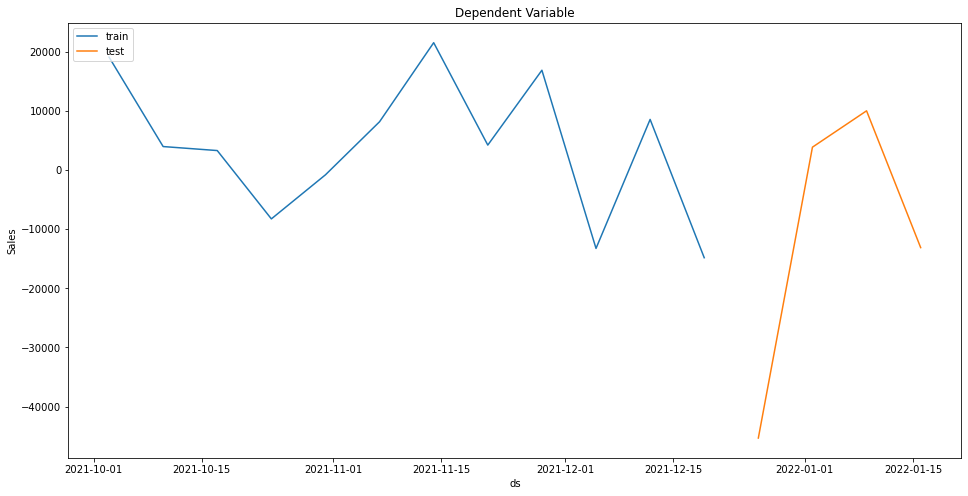

In [22]:
# Plot the test and train data
fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(x='ds', y='y', label='train', data=train, ax=ax)
sns.lineplot(x='ds', y='y', label='test', data=test, ax=ax)
plt.ticklabel_format(style='plain', axis='y')
ax.legend(loc='upper left')
ax.set(title='Dependent Variable', ylabel='Sales');
plt.ticklabel_format(style='plain', axis='y')



In [29]:
m = Prophet(weekly_seasonality=True,yearly_seasonality=True)
m.add_seasonality(name='weekly', period=len(train), fourier_order=2)
#m.add_country_holidays(country_name='UK')
m.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


In [30]:
future = m.make_future_dataframe(periods= 3, freq = 'W')
forecast = m.predict(future)
forecast

/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-10-03,-1723.171401,10049.779294,26749.306346,-1723.171401,-1723.171401,20327.002719,20327.002719,20327.002719,-20791.076751,-20791.076751,-20791.076751,41118.079470,41118.079470,41118.079470,0.0,0.0,0.0,18603.831318
1,2021-10-10,-2515.990253,-2344.892945,14269.243384,-2515.990253,-2515.990253,8485.418073,8485.418073,8485.418073,-20791.076751,-20791.076751,-20791.076751,29276.494823,29276.494823,29276.494823,0.0,0.0,0.0,5969.427820
2,2021-10-17,-3308.809104,-9136.947200,7400.269564,-3308.809104,-3308.809104,2676.147324,2676.147324,2676.147324,-20791.076751,-20791.076751,-20791.076751,23467.224075,23467.224075,23467.224075,0.0,0.0,0.0,-632.661780
3,2021-10-24,-4101.627956,-13397.447319,3576.794306,-4101.627956,-4101.627956,-338.916100,-338.916100,-338.916100,-20791.076751,-20791.076751,-20791.076751,20452.160651,20452.160651,20452.160651,0.0,0.0,0.0,-4440.544056
4,2021-10-31,-4894.446808,-10500.118393,6828.661476,-4894.446808,-4894.446808,2739.774072,2739.774072,2739.774072,-20791.076751,-20791.076751,-20791.076751,23530.850823,23530.850823,23530.850823,0.0,0.0,0.0,-2154.672735
5,2021-11-07,-5687.265660,-40.729408,16224.122803,-5687.265660,-5687.265660,13866.335790,13866.335790,13866.335790,-20791.076751,-20791.076751,-20791.076751,34657.412540,34657.412540,34657.412540,0.0,0.0,0.0,8179.070130
6,2021-11-14,-6480.084511,9697.180737,25998.915172,-6480.084511,-6480.084511,24233.776527,24233.776527,24233.776527,-20791.076751,-20791.076751,-20791.076751,45024.853278,45024.853278,45024.853278,0.0,0.0,0.0,17753.692016
7,2021-11-21,-7272.903363,7276.556368,23447.827944,-7272.903363,-7272.903363,22154.135345,22154.135345,22154.135345,-20791.076751,-20791.076751,-20791.076751,42945.212096,42945.212096,42945.212096,0.0,0.0,0.0,14881.231982
8,2021-11-28,-8065.722215,-4992.091771,11047.641279,-8065.722215,-8065.722215,10761.543952,10761.543952,10761.543952,-20791.076751,-20791.076751,-20791.076751,31552.620703,31552.620703,31552.620703,0.0,0.0,0.0,2695.821737
9,2021-12-05,-8858.541067,-10530.665975,6436.739619,-8858.541067,-8858.541067,6848.688795,6848.688795,6848.688795,-20791.076751,-20791.076751,-20791.076751,27639.765545,27639.765545,27639.765545,0.0,0.0,0.0,-2009.852273


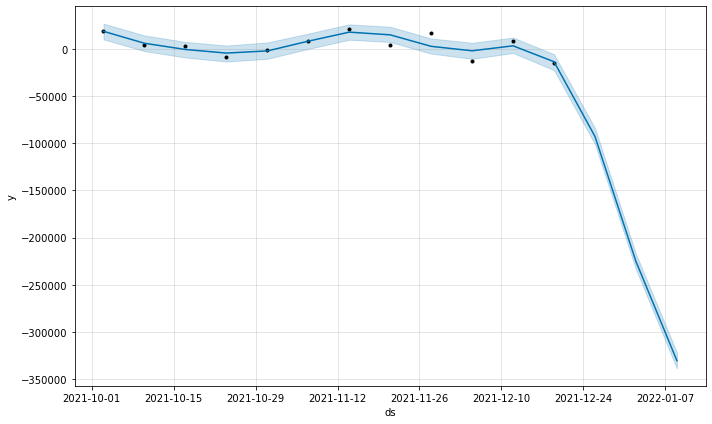

In [31]:
#plot the forcaste
fig1 = m.plot(forecast)


/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



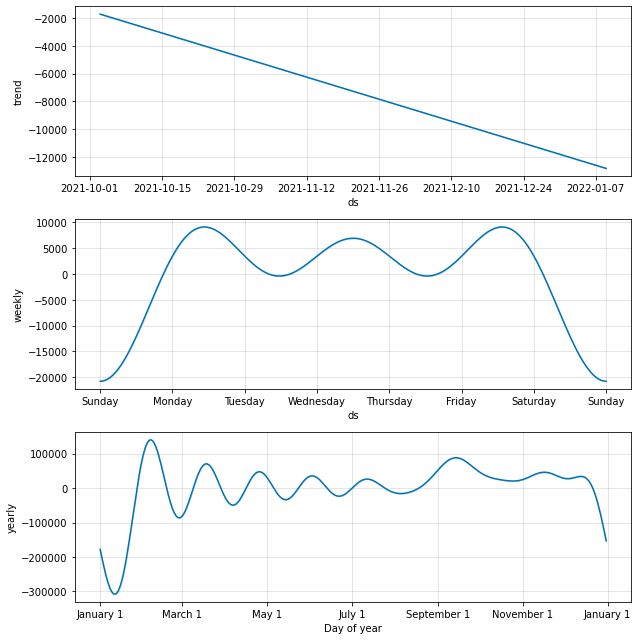

In [32]:
# plot the component
m.plot_components(forecast)
plt.show()

In [33]:
test_forecast=m.predict(test)
test_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/opt/anaconda3/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,ds,yhat,yhat_lower,yhat_upper
0,2021-12-26,-92866.424075,-100308.880760,-83976.894406
1,2022-01-02,-225303.138285,-233491.796240,-217091.713381
2,2022-01-09,-330397.629974,-338567.251251,-322066.939481
3,2022-01-16,-314675.331375,-323151.466984,-306777.129858


Text(0.5, 1.0, 'Forecast VS Actual')

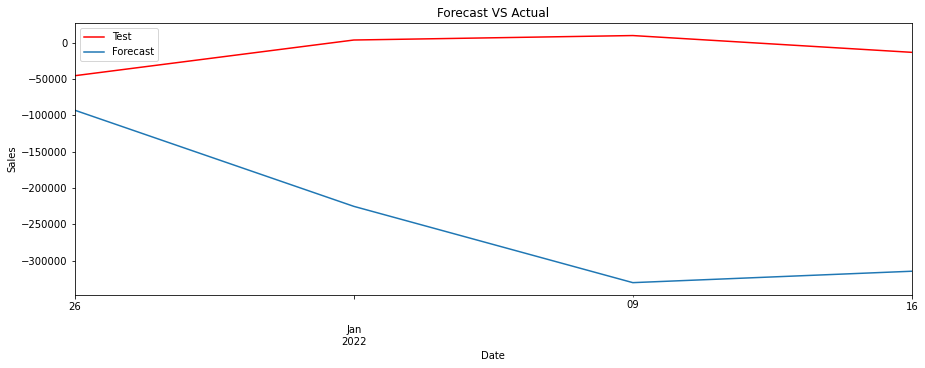

In [34]:
# Plot the forecast VS the actuals
f, ax = plt.subplots(figsize=(14, 5))
f.set_figheight(5)
f.set_figwidth(15)
test.plot(x='ds', y='y', color='r', label='Test', ax=ax)
test_forecast.plot(x='ds', y='yhat', label='Forecast', ax=ax)
plt.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.title('Forecast VS Actual')

### Evaluate the model performance

In [35]:
df_merge = pd.merge(test, forecast[['ds','yhat_lower','yhat_upper','yhat']],on='ds')
df_merge = df_merge[['ds','yhat_lower','yhat_upper','yhat','y']]
df_merge.head()

,ds,yhat_lower,yhat_upper,yhat,y
0,2021-12-26,-101041.262686,-83970.675239,-92866.424075,-45312.998738
1,2022-01-02,-233675.595685,-217236.263402,-225303.138285,3855.904261
2,2022-01-09,-338735.378033,-321820.203119,-330397.629974,10000.896112


In [40]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

y_true = df_merge['y'].values
y_pred = df_merge['yhat'].values
mae_01 = mean_absolute_error(y_true, y_pred)
mape_01 = mean_absolute_percentage_error(y_true, y_pred)

print('MAE:', mae_01, 'MAPE:',mape_01)

MAE: 205703.6646558227 MAPE: 31.505644580989923


In [46]:
# Let's tun the hpyer parameter
import itertools

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],   
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
maes = []  # Store the MAE for each params here
mapes = [] # Store the MAPE for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df_diff2)  # Fit model with given params
    df_cv = cross_validation(m, horizon='30', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    maes.append(df_p['mae'].values[0])
    mapes.append(df_p['mape'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['mae'] = maes
tuning_results['mape'] = mapes

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.
INFO:fbprophet:Making 15 forecasts with cutoffs between 2021-10-09 23:59:59.999999970 and 2022-01-15 23:59:59.999999970
INFO:fbprophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7fa46995a0a0>


Exception: Less than two datapoints before cutoff. Increase initial window.